In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_postSecondary = pd.read_excel("ncPostSecondary.xlsx")

## State secondary demographics and cluster enrollment 2020-2021

In [5]:
df_postSecondary = df_postSecondary.drop(["State", "Year", "Education Type"], axis=1)

In [6]:
df_gender = df_postSecondary[:3]
# df_gender
df_long = pd.melt(df_gender, id_vars=["Student Population"], var_name="Job Type", value_name="Count")
df_newgender = df_long.pivot(index="Job Type", columns="Student Population", values="Count")

df_newgender.reset_index(inplace=True)
new_order = ["Job Type", "Female", "Male", "Grand Total"]

df_newgender= df_newgender[new_order]

df_newgender

Student Population,Job Type,Female,Male,Grand Total
0,Agri. Food & Nat. Res.,489.0,630.0,1119.0
1,Arch. & Const.,499.0,2922.0,3421.0
2,"Arts, AV, Tech & Comm.",742.0,645.0,1387.0
3,Business Mgmt. & Admin.,8152.0,2344.0,10496.0
4,Education & Training,4197.0,122.0,4319.0
5,Finance,1555.0,478.0,2033.0
6,Govt. & Public Admin.,16.0,11.0,27.0
7,Health Science,12868.0,1582.0,14450.0
8,Hospitality & Tourism,680.0,446.0,1126.0
9,Human Services,2774.0,421.0,3195.0


In [7]:
df_newgender['Female Proportion'] = df_newgender['Female'] / df_newgender['Grand Total']
df_newgender['Male Proportion'] = df_newgender['Male'] / df_newgender['Grand Total']

df_newgender

Student Population,Job Type,Female,Male,Grand Total,Female Proportion,Male Proportion
0,Agri. Food & Nat. Res.,489.0,630.0,1119.0,0.436997,0.563003
1,Arch. & Const.,499.0,2922.0,3421.0,0.145864,0.854136
2,"Arts, AV, Tech & Comm.",742.0,645.0,1387.0,0.534968,0.465032
3,Business Mgmt. & Admin.,8152.0,2344.0,10496.0,0.776677,0.223323
4,Education & Training,4197.0,122.0,4319.0,0.971753,0.028247
5,Finance,1555.0,478.0,2033.0,0.764879,0.235121
6,Govt. & Public Admin.,16.0,11.0,27.0,0.592593,0.407407
7,Health Science,12868.0,1582.0,14450.0,0.890519,0.109481
8,Hospitality & Tourism,680.0,446.0,1126.0,0.603908,0.396092
9,Human Services,2774.0,421.0,3195.0,0.868232,0.131768


In [8]:
# mapping to make the columns correct

name_mapping2 = {
    "Agri. Food & Nat. Res.": "Agricultural & Natural Resources Tech",
    "Arch. & Const.": "Architecture and Construction",
    "Arts, AV, Tech & Comm.": "Arts, Audio/Video Techn and Comm",
    "Business Mgmt. & Admin.": "Business Management and Administration",
    "Education & Training": "Education and Training",
    "Finance":"Finance",
    "Hospitality & Tourism": "Hospitality and Tourism",
    "Human Services": "Human Services",
    "Information Technology": "Information Technology",
    "Law,. Public Safety, Cor. & Sec.": "Law, Public Safety, Corrections and Security",
    "Transp. Distr. & Logis.": "Transportation, Distribution & Logistics",
    "STEM": "Science, Tech, Engineering and Math",
    "Marketing": "Marketing Sales & Services"

}

df_newgender['Job Type'] = df_newgender['Job Type'].replace(name_mapping2)
df_newgender = df_newgender.dropna(axis='rows')
df_newgender = df_newgender.sort_values(by='Female Proportion', ascending=False)

In [9]:
# making the x-axis

index_job_mapping = df_newgender['Job Type'].to_dict()

job_index_mapping = {index: job for index, job in index_job_mapping.items()}

for index, job in job_index_mapping.items():
    print(f"Index {index}: {job}")

Index 4: Education and Training
Index 7: Health Science
Index 9: Human Services
Index 3: Business Management and Administration
Index 5: Finance
Index 14: Other (specify)
Index 8: Hospitality and Tourism
Index 16: Total Number Of Students
Index 6: Govt. & Public Admin.
Index 11: Law, Public Safety, Corrections and Security
Index 2: Arts, Audio/Video Techn and Comm
Index 0: Agricultural & Natural Resources Tech
Index 13: Marketing Sales & Services
Index 10: Information Technology
Index 15: Science, Tech, Engineering and Math
Index 1: Architecture and Construction
Index 17: Transportation, Distribution & Logistics
Index 12: Manufacturing


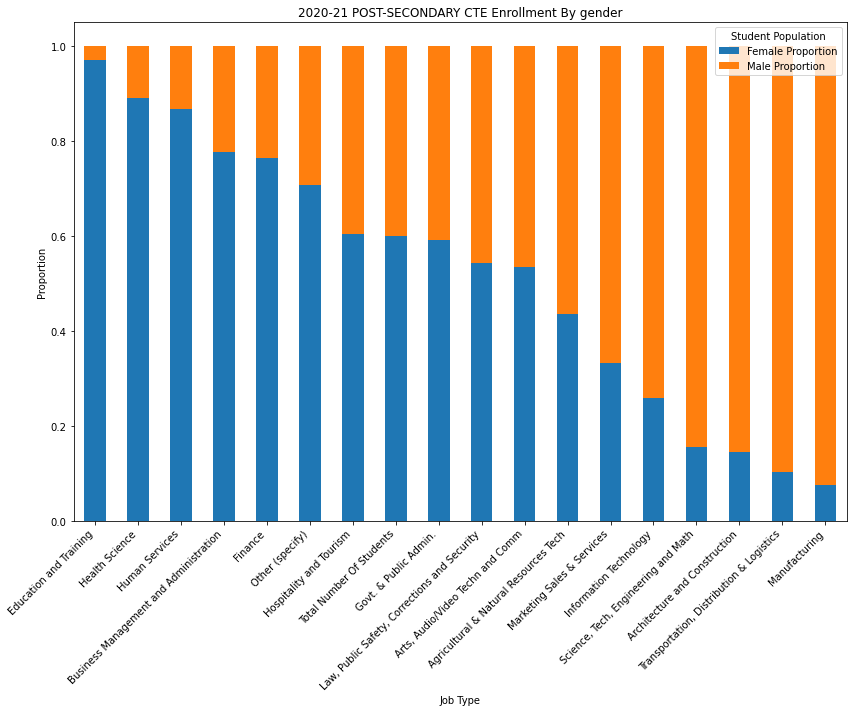

In [10]:

df_newgender.plot(kind='bar', stacked=True, y=['Female Proportion', 'Male Proportion'], figsize=(12, 10))
plt.title('2020-21 POST-SECONDARY CTE Enrollment By gender')
plt.xlabel('Job Type')
plt.ylabel('Proportion')

plt.xticks(ticks=range(len(job_index_mapping)), labels=job_index_mapping.values(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [11]:
df_race = df_postSecondary[3:10]
df_race

,Student Population,Total Number Of Students,Agri. Food & Nat. Res.,Arch. & Const.,"Arts, AV, Tech & Comm.",Business Mgmt. & Admin.,Education & Training,Finance,Govt. & Public Admin.,Health Science,Hospitality & Tourism,Human Services,Information Technology,"Law,. Public Safety, Cor. & Sec.",Manufacturing,Marketing,STEM,Transp. Distr. & Logis.,Other (specify)
3,American Indian or Alaskan Native,1090.0,9.0,85.0,6.0,181.0,87.0,32.0,0.0,311.0,23.0,44.0,68.0,86.0,95.0,0.0,32.0,30.0,1.0
4,Asian,1396.0,3.0,72.0,38.0,167.0,63.0,94.0,1.0,308.0,28.0,45.0,310.0,36.0,43.0,0.0,81.0,94.0,13.0
5,Black or African American,13032.0,68.0,462.0,231.0,3179.0,1537.0,334.0,10.0,2594.0,339.0,725.0,1348.0,1033.0,355.0,0.0,257.0,504.0,56.0
6,Hispanic/Latino,7333.0,88.0,631.0,172.0,1166.0,533.0,347.0,5.0,1359.0,142.0,392.0,692.0,660.0,342.0,0.0,285.0,463.0,56.0
7,Native Hawaiian or Other Pacific Islander,105.0,1.0,5.0,0.0,21.0,5.0,4.0,0.0,20.0,1.0,6.0,11.0,13.0,4.0,0.0,3.0,9.0,2.0
8,White,36358.0,892.0,1994.0,854.0,5246.0,1916.0,1126.0,10.0,9130.0,508.0,1820.0,3608.0,2906.0,2640.0,6.0,1604.0,1961.0,137.0
9,Two or More Races,1501.0,27.0,51.0,42.0,266.0,79.0,34.0,0.0,371.0,40.0,70.0,183.0,125.0,75.0,0.0,53.0,79.0,6.0


In [12]:
df_longrace = pd.melt(df_race, id_vars=["Student Population"], var_name="Job Type", value_name="Count")
df_newrace = df_longrace.pivot(index="Job Type", columns="Student Population", values="Count")
df_newrace.reset_index(inplace=True)

df_newrace

Student Population,Job Type,American Indian or Alaskan Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White
0,Agri. Food & Nat. Res.,9.0,3.0,68.0,88.0,1.0,27.0,892.0
1,Arch. & Const.,85.0,72.0,462.0,631.0,5.0,51.0,1994.0
2,"Arts, AV, Tech & Comm.",6.0,38.0,231.0,172.0,0.0,42.0,854.0
3,Business Mgmt. & Admin.,181.0,167.0,3179.0,1166.0,21.0,266.0,5246.0
4,Education & Training,87.0,63.0,1537.0,533.0,5.0,79.0,1916.0
5,Finance,32.0,94.0,334.0,347.0,4.0,34.0,1126.0
6,Govt. & Public Admin.,0.0,1.0,10.0,5.0,0.0,0.0,10.0
7,Health Science,311.0,308.0,2594.0,1359.0,20.0,371.0,9130.0
8,Hospitality & Tourism,23.0,28.0,339.0,142.0,1.0,40.0,508.0
9,Human Services,44.0,45.0,725.0,392.0,6.0,70.0,1820.0


In [13]:
df_newrace['Job Type'] = df_newrace['Job Type'].replace(name_mapping2)
df_newrace = df_newrace.dropna(axis='rows')

columns_to_sum = df_newrace.columns.difference(['Job Type'])
df_newrace['Total'] = df_newrace[columns_to_sum].sum(axis=1)

In [14]:
df_newrace['White Proportion'] = df_newrace['White'] / df_newrace['Total']
df_newrace['Black Proportion'] = df_newrace['Black or African American '] / df_newrace['Total']
df_newrace['AI / AN Proportion'] = df_newrace['American Indian or Alaskan Native '] / df_newrace['Total']
df_newrace['Hispanic/Latino Proportion'] = df_newrace['Hispanic/Latino'] / df_newrace['Total']
df_newrace['Two or More Proportion'] = df_newrace['Two or More Races'] / df_newrace['Total']
df_newrace['Asian Proportion'] = df_newrace['Asian'] / df_newrace['Total']

In [15]:
df_newrace

Student Population,Job Type,American Indian or Alaskan Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,Total,White Proportion,Black Proportion,AI / AN Proportion,Hispanic/Latino Proportion,Two or More Proportion,Asian Proportion
0,Agricultural & Natural Resources Tech,9.0,3.0,68.0,88.0,1.0,27.0,892.0,1088.0,0.819853,0.062500,0.008272,0.080882,0.024816,0.002757
1,Architecture and Construction,85.0,72.0,462.0,631.0,5.0,51.0,1994.0,3300.0,0.604242,0.140000,0.025758,0.191212,0.015455,0.021818
2,"Arts, Audio/Video Techn and Comm",6.0,38.0,231.0,172.0,0.0,42.0,854.0,1343.0,0.635890,0.172003,0.004468,0.128071,0.031273,0.028295
3,Business Management and Administration,181.0,167.0,3179.0,1166.0,21.0,266.0,5246.0,10226.0,0.513006,0.310874,0.017700,0.114023,0.026012,0.016331
4,Education and Training,87.0,63.0,1537.0,533.0,5.0,79.0,1916.0,4220.0,0.454028,0.364218,0.020616,0.126303,0.018720,0.014929
5,Finance,32.0,94.0,334.0,347.0,4.0,34.0,1126.0,1971.0,0.571284,0.169457,0.016235,0.176053,0.017250,0.047692
6,Govt. & Public Admin.,0.0,1.0,10.0,5.0,0.0,0.0,10.0,26.0,0.384615,0.384615,0.000000,0.192308,0.000000,0.038462
7,Health Science,311.0,308.0,2594.0,1359.0,20.0,371.0,9130.0,14093.0,0.647839,0.184063,0.022068,0.096431,0.026325,0.021855
8,Hospitality and Tourism,23.0,28.0,339.0,142.0,1.0,40.0,508.0,1081.0,0.469935,0.313599,0.021277,0.131360,0.037003,0.025902
9,Human Services,44.0,45.0,725.0,392.0,6.0,70.0,1820.0,3102.0,0.586718,0.233720,0.014184,0.126370,0.022566,0.014507


In [16]:
# making the x-axis
df_newrace = df_newrace.sort_values(by='White Proportion', ascending=False)

index_job_mapping = df_newrace['Job Type'].to_dict()

job_index_mapping = {index: job for index, job in index_job_mapping.items()}

for index, job in job_index_mapping.items():
    print(f"Index {index}: {job}")

Index 13: Marketing Sales & Services
Index 0: Agricultural & Natural Resources Tech
Index 12: Manufacturing
Index 15: Science, Tech, Engineering and Math
Index 7: Health Science
Index 2: Arts, Audio/Video Techn and Comm
Index 17: Transportation, Distribution & Logistics
Index 1: Architecture and Construction
Index 11: Law, Public Safety, Corrections and Security
Index 16: Total Number Of Students
Index 9: Human Services
Index 10: Information Technology
Index 5: Finance
Index 3: Business Management and Administration
Index 14: Other (specify)
Index 8: Hospitality and Tourism
Index 4: Education and Training
Index 6: Govt. & Public Admin.


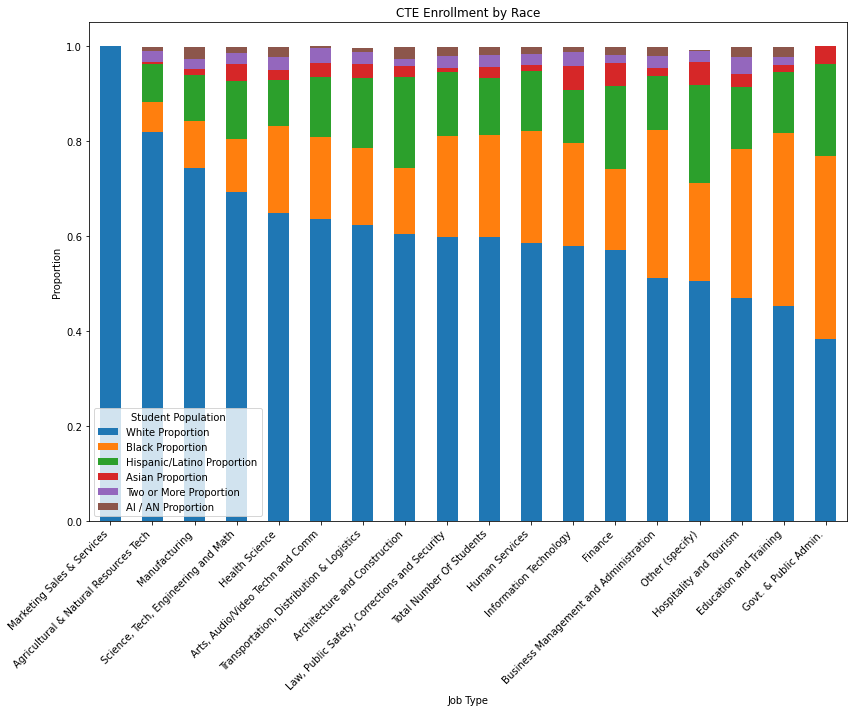

In [17]:
df_newrace.plot(kind='bar', stacked=True,y = ['White Proportion', 'Black Proportion','Hispanic/Latino Proportion','Asian Proportion','Two or More Proportion','AI / AN Proportion' ],figsize=(12, 10))
plt.title('CTE Enrollment by Race')
plt.xlabel('Job Type')
plt.ylabel('Proportion')

plt.xticks(ticks=range(len(job_index_mapping)), labels=job_index_mapping.values(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [18]:
df_ability = df_postSecondary[11:13]
#No NC Data on Individuals WITH disabilities
df_ability

,Student Population,Total Number Of Students,Agri. Food & Nat. Res.,Arch. & Const.,"Arts, AV, Tech & Comm.",Business Mgmt. & Admin.,Education & Training,Finance,Govt. & Public Admin.,Health Science,Hospitality & Tourism,Human Services,Information Technology,"Law,. Public Safety, Cor. & Sec.",Manufacturing,Marketing,STEM,Transp. Distr. & Logis.,Other (specify)
11,Individuals With Disabilities (ESEA/IDEA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Individuals With Disabilities (ADA),1883.0,67.0,64.0,67.0,257.0,175.0,29.0,0.0,491.0,53.0,54.0,276.0,79.0,99.0,1.0,78.0,90.0,3.0


## Demonstrating relationships by occupation and CTE

In [21]:
# IMPORT CLUSTER WAGE MEAN

df_wages2 = pd.read_csv('df_wages2.csv')

In [24]:
cluster_wage_mean = pd.read_csv('clustermean.csv')

In [22]:
list(df_wages2)


['Area Name',
 'Occupational Code',
 'Occupation',
 'Naics Code',
 'Industry',
 'Year',
 'Employment',
 'Employment Relative Standard Error',
 'Response Rate(%)',
 'Hourly wage; mean',
 'Annual wage; mean',
 'Wage Relative Standard Error',
 'Hourly wage; 10th percentile',
 'Hourly wage; 25th percentile',
 'Hourly wage; median',
 'Hourly wage; 75th percentile',
 'Hourly wage; 90th percentile',
 'Annual wage; 10th percentile',
 'Annual wage; 25th percentile',
 'Annual wage; median',
 'Annual wage; 75th percentile',
 'Annual wage; 90th percentile',
 'Career Cluster Code',
 'Career Cluster Name',
 'Career Cluster Name-2.0']

In [25]:
df_newrace

Student Population,Job Type,American Indian or Alaskan Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,Total,White Proportion,Black Proportion,AI / AN Proportion,Hispanic/Latino Proportion,Two or More Proportion,Asian Proportion
13,Marketing Sales & Services,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,Agricultural & Natural Resources Tech,9.0,3.0,68.0,88.0,1.0,27.0,892.0,1088.0,0.819853,0.062500,0.008272,0.080882,0.024816,0.002757
12,Manufacturing,95.0,43.0,355.0,342.0,4.0,75.0,2640.0,3554.0,0.742825,0.099887,0.026730,0.096230,0.021103,0.012099
15,"Science, Tech, Engineering and Math",32.0,81.0,257.0,285.0,3.0,53.0,1604.0,2315.0,0.692873,0.111015,0.013823,0.123110,0.022894,0.034989
7,Health Science,311.0,308.0,2594.0,1359.0,20.0,371.0,9130.0,14093.0,0.647839,0.184063,0.022068,0.096431,0.026325,0.021855
2,"Arts, Audio/Video Techn and Comm",6.0,38.0,231.0,172.0,0.0,42.0,854.0,1343.0,0.635890,0.172003,0.004468,0.128071,0.031273,0.028295
17,"Transportation, Distribution & Logistics",30.0,94.0,504.0,463.0,9.0,79.0,1961.0,3140.0,0.624522,0.160510,0.009554,0.147452,0.025159,0.029936
1,Architecture and Construction,85.0,72.0,462.0,631.0,5.0,51.0,1994.0,3300.0,0.604242,0.140000,0.025758,0.191212,0.015455,0.021818
11,"Law, Public Safety, Corrections and Security",86.0,36.0,1033.0,660.0,13.0,125.0,2906.0,4859.0,0.598065,0.212595,0.017699,0.135830,0.025725,0.007409
16,Total Number Of Students,1090.0,1396.0,13032.0,7333.0,105.0,1501.0,36358.0,60815.0,0.597846,0.214289,0.017923,0.120579,0.024681,0.022955


In [26]:
#pivot longer and facet wrap - 
#don't color by job type
#add ERROR bars
df_clusternames = pd.read_excel("cluster names.xlsx")

In [27]:
cluster_wage_mean.rename(columns={'Career Cluster Name-2.0': 'Job Type'}, inplace=True)
cluster_wage_mean.rename(columns={'mean': 'Annual wage; mean', 'std': 'Annual Wage; Std Dev'}, inplace=True)

cluster_wages = pd.merge(cluster_wage_mean, df_newrace, on='Job Type', how='outer')
cluster_wages2 = pd.merge(cluster_wages, df_clusternames, left_on='Job Type', right_on = "description", how='left')

cluster_wages2 = cluster_wages2.drop(['description','Total'],axis=1)

In [28]:
cluster_wages2 = cluster_wages2.dropna( axis = "rows")
cluster_wages2

,Job Type,Annual wage; mean,Annual Wage; Std Dev,American Indian or Alaskan Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,White Proportion,Black Proportion,AI / AN Proportion,Hispanic/Latino Proportion,Two or More Proportion,Asian Proportion,code
0,Agricultural & Natural Resources Tech,61668.60,26220.001937,9.0,3.0,68.0,88.0,1.0,27.0,892.0,0.819853,0.062500,0.008272,0.080882,0.024816,0.002757,AGNR
1,Architecture and Construction,57616.43,24196.279810,85.0,72.0,462.0,631.0,5.0,51.0,1994.0,0.604242,0.140000,0.025758,0.191212,0.015455,0.021818,ARCH
2,"Arts, Audio/Video Techn and Comm",72514.67,19108.586277,6.0,38.0,231.0,172.0,0.0,42.0,854.0,0.635890,0.172003,0.004468,0.128071,0.031273,0.028295,AAVC
3,Business Management and Administration,105087.31,53006.240882,181.0,167.0,3179.0,1166.0,21.0,266.0,5246.0,0.513006,0.310874,0.017700,0.114023,0.026012,0.016331,BMA
5,Education and Training,66332.27,32162.170276,87.0,63.0,1537.0,533.0,5.0,79.0,1916.0,0.454028,0.364218,0.020616,0.126303,0.018720,0.014929,EDUC
6,Finance,82748.85,38063.585047,32.0,94.0,334.0,347.0,4.0,34.0,1126.0,0.571284,0.169457,0.016235,0.176053,0.017250,0.047692,FINA
7,Health Science,147070.70,106629.216768,311.0,308.0,2594.0,1359.0,20.0,371.0,9130.0,0.647839,0.184063,0.022068,0.096431,0.026325,0.021855,HLTH
8,Hospitality and Tourism,35527.92,14122.960023,23.0,28.0,339.0,142.0,1.0,40.0,508.0,0.469935,0.313599,0.021277,0.131360,0.037003,0.025902,HOSP
9,Human Services,50009.06,20239.789005,44.0,45.0,725.0,392.0,6.0,70.0,1820.0,0.586718,0.233720,0.014184,0.126370,0.022566,0.014507,HUMA
10,Information Technology,78226.36,34427.196173,68.0,310.0,1348.0,692.0,11.0,183.0,3608.0,0.580064,0.216720,0.010932,0.111254,0.029421,0.049839,INFO


### Visualizing

In [29]:
melted_data = cluster_wages2.melt(id_vars=['Job Type', 'Annual wage; mean', 'code'], 
                                 value_vars=['White Proportion','Black Proportion',	'Hispanic/Latino Proportion','Asian Proportion'], 
                                 var_name='Race', value_name='Proportion')

print(melted_data.head())


                                 Job Type  Annual wage; mean  code  \
0   Agricultural & Natural Resources Tech           61668.60  AGNR   
1           Architecture and Construction           57616.43  ARCH   
2        Arts, Audio/Video Techn and Comm           72514.67  AAVC   
3  Business Management and Administration          105087.31   BMA   
4                  Education and Training           66332.27  EDUC   

               Race  Proportion  
0  White Proportion    0.819853  
1  White Proportion    0.604242  
2  White Proportion    0.635890  
3  White Proportion    0.513006  
4  White Proportion    0.454028  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


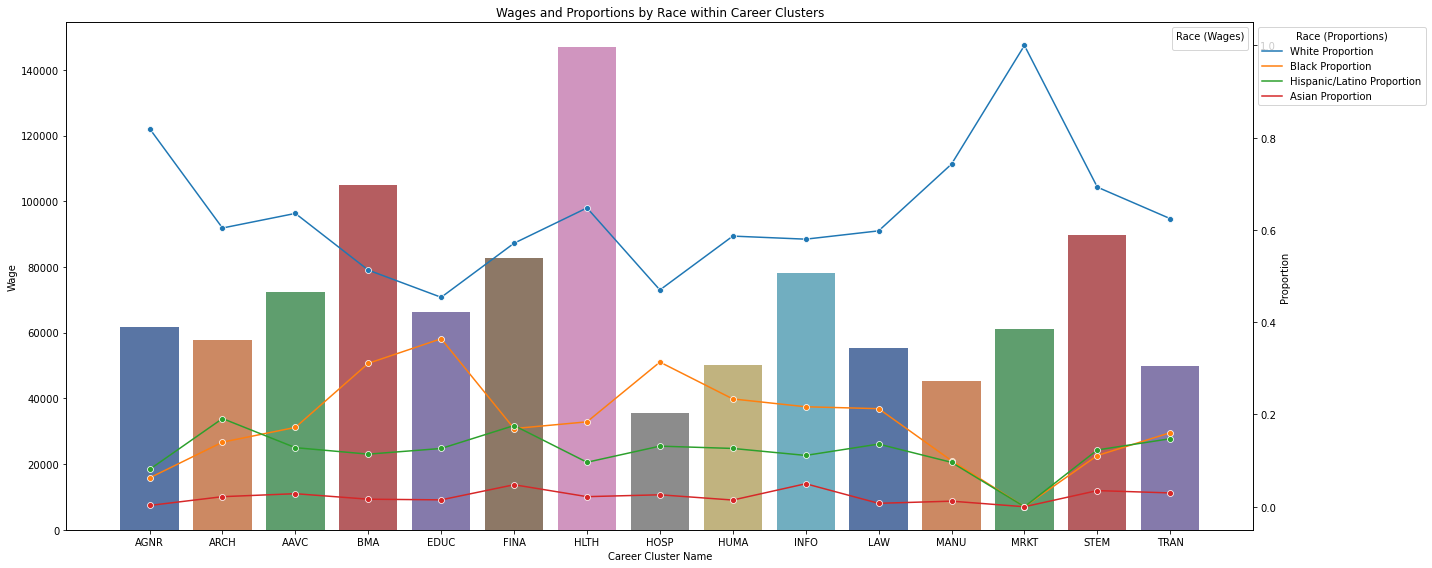

In [30]:
import seaborn as sns
plt.figure(figsize=(20, 8))
ax1 = sns.barplot(x='code', y='Annual wage; mean', data=melted_data, palette='deep')

ax2 = ax1.twinx()

sns.lineplot(x='Job Type', y='Proportion', hue='Race', data=melted_data, marker='o', sort=False, ax=ax2)

ax1.set_title('Wages and Proportions by Race within Career Clusters')
ax1.set_xlabel('Career Cluster Name')
ax1.set_ylabel('Wage')
ax2.set_ylabel('Proportion')

ax1.legend(title='Race (Wages)')
ax2.legend(title='Race (Proportions)', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


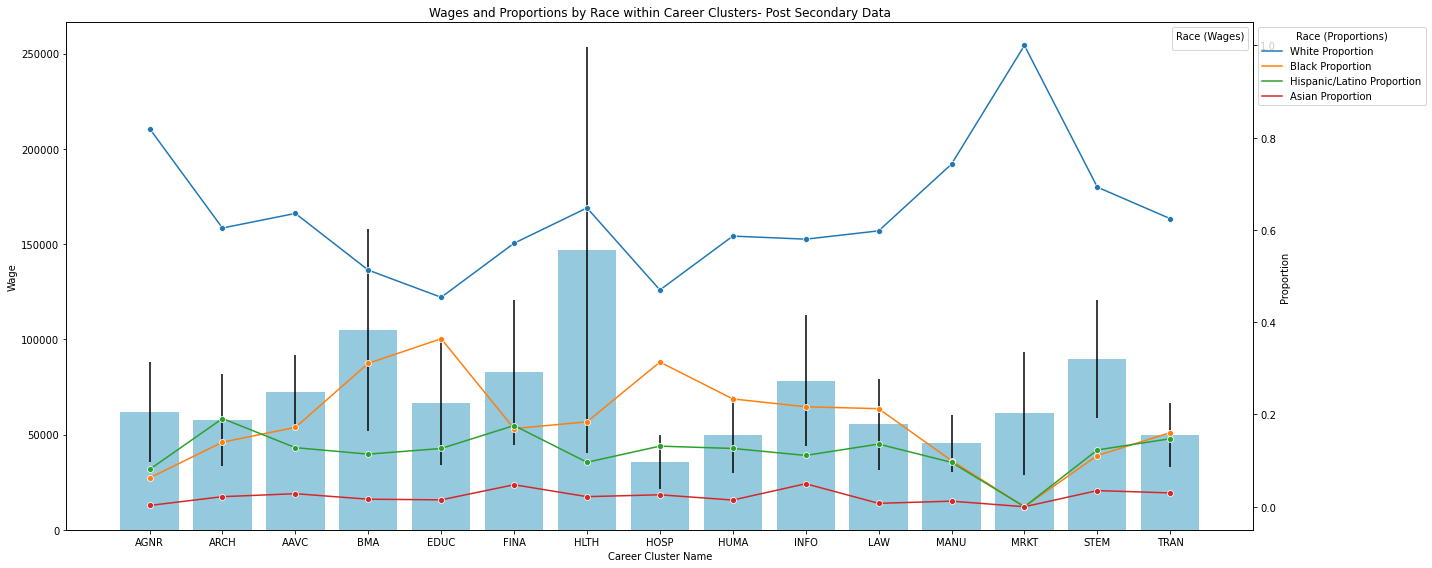

In [32]:
plt.figure(figsize=(20, 8))
ax1 = sns.barplot(x='code', y='Annual wage; mean', data=melted_data,  color='skyblue', yerr=cluster_wages2['Annual Wage; Std Dev'])

ax2 = ax1.twinx()

sns.lineplot(x='Job Type', y='Proportion', hue='Race', data=melted_data, marker='o', sort=False, ax=ax2)

ax1.set_title('Wages and Proportions by Race within Career Clusters- Post Secondary Data')
ax1.set_xlabel('Career Cluster Name')
ax1.set_ylabel('Wage')
ax2.set_ylabel('Proportion')

ax1.legend(title='Race (Wages)')
ax2.legend(title='Race (Proportions)', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [33]:
df_newrace

Student Population,Job Type,American Indian or Alaskan Native,Asian,Black or African American,Hispanic/Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,White,Total,White Proportion,Black Proportion,AI / AN Proportion,Hispanic/Latino Proportion,Two or More Proportion,Asian Proportion
13,Marketing Sales & Services,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,Agricultural & Natural Resources Tech,9.0,3.0,68.0,88.0,1.0,27.0,892.0,1088.0,0.819853,0.062500,0.008272,0.080882,0.024816,0.002757
12,Manufacturing,95.0,43.0,355.0,342.0,4.0,75.0,2640.0,3554.0,0.742825,0.099887,0.026730,0.096230,0.021103,0.012099
15,"Science, Tech, Engineering and Math",32.0,81.0,257.0,285.0,3.0,53.0,1604.0,2315.0,0.692873,0.111015,0.013823,0.123110,0.022894,0.034989
7,Health Science,311.0,308.0,2594.0,1359.0,20.0,371.0,9130.0,14093.0,0.647839,0.184063,0.022068,0.096431,0.026325,0.021855
2,"Arts, Audio/Video Techn and Comm",6.0,38.0,231.0,172.0,0.0,42.0,854.0,1343.0,0.635890,0.172003,0.004468,0.128071,0.031273,0.028295
17,"Transportation, Distribution & Logistics",30.0,94.0,504.0,463.0,9.0,79.0,1961.0,3140.0,0.624522,0.160510,0.009554,0.147452,0.025159,0.029936
1,Architecture and Construction,85.0,72.0,462.0,631.0,5.0,51.0,1994.0,3300.0,0.604242,0.140000,0.025758,0.191212,0.015455,0.021818
11,"Law, Public Safety, Corrections and Security",86.0,36.0,1033.0,660.0,13.0,125.0,2906.0,4859.0,0.598065,0.212595,0.017699,0.135830,0.025725,0.007409
16,Total Number Of Students,1090.0,1396.0,13032.0,7333.0,105.0,1501.0,36358.0,60815.0,0.597846,0.214289,0.017923,0.120579,0.024681,0.022955


In [34]:
melted_data

,Job Type,Annual wage; mean,code,Race,Proportion
0,Agricultural & Natural Resources Tech,61668.60,AGNR,White Proportion,0.819853
1,Architecture and Construction,57616.43,ARCH,White Proportion,0.604242
2,"Arts, Audio/Video Techn and Comm",72514.67,AAVC,White Proportion,0.635890
3,Business Management and Administration,105087.31,BMA,White Proportion,0.513006
4,Education and Training,66332.27,EDUC,White Proportion,0.454028
5,Finance,82748.85,FINA,White Proportion,0.571284
6,Health Science,147070.70,HLTH,White Proportion,0.647839
7,Hospitality and Tourism,35527.92,HOSP,White Proportion,0.469935
8,Human Services,50009.06,HUMA,White Proportion,0.586718
9,Information Technology,78226.36,INFO,White Proportion,0.580064


In [36]:
import plotly.express as px

fig = px.bar(melted_data, x='Job Type', y='Annual wage; mean', color='Race', barmode='group')
fig.update_layout(title='Annual Wage Disparities by Race within Job Categories', xaxis_title='Job Type', yaxis_title='Annual Wage Mean')
fig.show()

In [38]:
melted_data.to_csv('postsecondary-wages-race.csv', index=False)